In [3]:
# KNN算法

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#　图显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

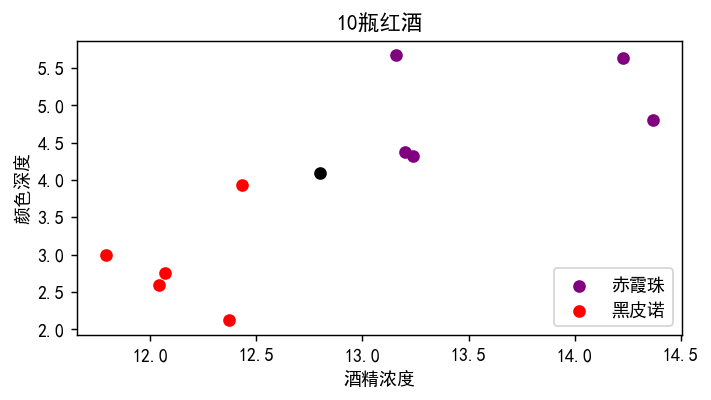

In [15]:
# 生成红酒数据 品种0:赤霞珠 品种1:黑皮诺
rowdata = {'酒精浓度':[14.23, 13.2, 13.16, 14.37, 13.24, 12.07, 12.43, 11.79, 12.37, 12.04],
          '颜色深度':[5.64, 4.38, 5.68, 4.80, 4.32, 2.76, 3.94, 3.0, 2.12, 2.6],
          '品种':[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]}
# 将字段转化为DataFrame
wine_df = pd.DataFrame(rowdata)
# 测试对象
new_data = np.array([12.8, 4.1])
# 绘制散点图,观察数据
plt.figure(figsize=(6, 3), dpi=130)
plt.scatter(wine_df[wine_df.品种 == 0]['酒精浓度'],wine_df[wine_df.品种 == 0]['颜色深度'], c='purple', label='赤霞珠')
plt.scatter(wine_df[wine_df.品种 == 1]['酒精浓度'],wine_df[wine_df.品种 == 1]['颜色深度'], c='red', label='黑皮诺')
plt.title('10瓶红酒')
plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')
plt.legend(loc=4)
# 插入测试点
plt.scatter(new_data[0], new_data[1], c='black')

In [16]:
# 创建KNN对象
KNN = KNeighborsClassifier(n_neighbors=4)
X = wine_df.iloc[:,:2].values
Y = wine_df.iloc[:,-1].values
# 训练模型
KNN.fit(X,Y)
# 将new_data数据修改为二维
new_data = new_data.reshape(1,2)
# 测试模型
test = KNN.predict(new_data)
print(test)

[0]


In [17]:
# 创建多个值
new_data = np.array([ [12.8, 4.1],[12.3, 6.4],[8.7, 4.2] ])
print(KNN.predict(new_data))

[0 0 1]


In [18]:
#　使用KNN算法预测癌症
# 导入数据
from sklearn.datasets import load_breast_cancer
# 导入切分数据库
from sklearn.model_selection import train_test_split

In [19]:
breast = load_breast_cancer()
# 设置列名
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度',
        '平均凹点','平均对称','平均分形维数',
        '半径误差','纹理误差','周长误差','面积误差',
        '平滑度误差','紧凑度误差','凹度误差',
        '凹点误差','对称误差',
        '分形维数误差','最差半径','最差纹理',
        '最差的边界','最差的区域','最差的平滑度',
        '最差的紧凑性','最差的凹陷','最差的凹点',
        '最差的对称性','最差的分形维数']
df = pd.DataFrame(breast.data, columns=name)
df.head()

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均紧凑度,平均凹度,平均凹点,平均对称,平均分形维数,...,最差半径,最差纹理,最差的边界,最差的区域,最差的平滑度,最差的紧凑性,最差的凹陷,最差的凹点,最差的对称性,最差的分形维数
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
平均半径       569 non-null float64
平均纹理       569 non-null float64
平均周长       569 non-null float64
平均面积       569 non-null float64
平均光滑度      569 non-null float64
平均紧凑度      569 non-null float64
平均凹度       569 non-null float64
平均凹点       569 non-null float64
平均对称       569 non-null float64
平均分形维数     569 non-null float64
半径误差       569 non-null float64
纹理误差       569 non-null float64
周长误差       569 non-null float64
面积误差       569 non-null float64
平滑度误差      569 non-null float64
紧凑度误差      569 non-null float64
凹度误差       569 non-null float64
凹点误差       569 non-null float64
对称误差       569 non-null float64
分形维数误差     569 non-null float64
最差半径       569 non-null float64
最差纹理       569 non-null float64
最差的边界      569 non-null float64
最差的区域      569 non-null float64
最差的平滑度     569 non-null float64
最差的紧凑性     569 non-null float64
最差的凹陷      569 non-null float64
最差的凹点      569 non-null float64

In [31]:
# 切分数据集
X = breast.data
Y = breast.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

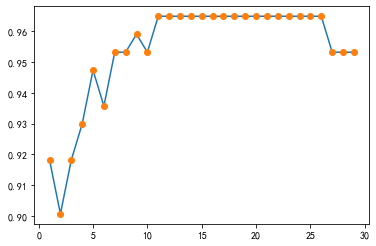

In [32]:
# 绘制学习曲线
l = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    l.append(knn.score(x_test, y_test))
plt.plot(range(1,30), l)
plt.plot(range(1,30), l, 'o')

In [34]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
print('训练集: ',knn.score(x_train, y_train))
print('测试集: ',knn.score(x_test, y_test))

训练集:  0.9346733668341709
测试集:  0.9649122807017544


In [35]:
# 交叉验证
from sklearn.model_selection import cross_val_score

In [38]:
cr = cross_val_score(knn, x_train, y_train, cv=5)
print(cr.mean())

0.9347435897435897
